# Домашнее задание №1
#### Выполнил студент 4 группы 2 курса ФХ НИУ ВШЭ Василий Митурич
---

Для выбранного генома бактерии скачать файлы разметки генома генами – feature table и сам полный геном (.fna)

Написать ответы на вопросы:

1. Какова длина генома (файл .fna)
2. Сколько генов, кодирующих белки?
3. Сколько рнк-генов?
4. Сколько транскрипционных факторов?
5. Сколько транспортных белков (ABC transporters)?
6. Сколько tRNA?
7. Сколько закодировано субъединиц АTP-synthase?
8. Сколько генов закодировано на положительном, а сколько на отрицательном стренде?

Для назначенного гена человека сделать следующее:

Инфо: Изоформа гена – разные комбинации экзонов, чтобы сделать белок. Выбираются при помощи альтернативного сплайсинга.

1. В геномном браузере UCSC отобразить все изоформы гена, а также SNPs (common and clinically relevant), участки консервативности среди позвоночных и транспозоны. Сохранить скриншот в виде графического файла.
2. Отобрать в табличном виде и сохранить в текстовый файл все изоформы генов, попавших в заданный участок
3. Отобрать координаты только экзонов и только интронов для заданного участка.
4. Ответить письменно, в какие участки гена попадают clinically relevant SNPs.
5. Ответить письменно, в какие участки гена попадают транспозоны.

### 1. Загрузим данные и посмотрим на них

In [2]:
!wget -rnH --cut-dirs=5 ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Acetobacter_aceti/latest_assembly_versions/GCF_000379545.1_ASM37954v1/ -P ./data/

--2021-10-16 19:42:49--  ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Acetobacter_aceti/latest_assembly_versions/GCF_000379545.1_ASM37954v1/
           => ‘./data/GCF_000379545.1_ASM37954v1/.listing’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.11, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/refseq/bacteria/Acetobacter_aceti/latest_assembly_versions/GCF_000379545.1_ASM37954v1 ... done.
==> PASV ... done.    ==> LIST ... done.

GCF_000379545.1_ASM     [ <=>                ]   1,92K  --.-KB/s    in 0,1s    

2021-10-16 19:42:52 (16,7 KB/s) - ‘./data/GCF_000379545.1_ASM37954v1/.listing’ saved [1971]

Removed ‘./data/GCF_000379545.1_ASM37954v1/.listing’.
--2021-10-16 19:42:52--  ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Acetobacter_aceti/latest_asse

In [3]:
!tree data

data
└── GCF_000379545.1_ASM37954v1
    ├── annotation_hashes.txt
    ├── assembly_status.txt
    ├── GCF_000379545.1_ASM37954v1_assembly_report.txt
    ├── GCF_000379545.1_ASM37954v1_assembly_stats.txt
    ├── GCF_000379545.1_ASM37954v1_assembly_structure
    │   ├── Primary_Assembly
    │   │   ├── component_localID2acc
    │   │   ├── scaffold_localID2acc
    │   │   └── unplaced_scaffolds
    │   │       ├── AGP
    │   │       │   └── unplaced.scaf.agp.gz
    │   │       └── FASTA
    │   │           └── unplaced.scaf.fna.gz
    │   └── README.txt
    ├── GCF_000379545.1_ASM37954v1_cds_from_genomic.fna.gz
    ├── GCF_000379545.1_ASM37954v1_feature_count.txt.gz
    ├── GCF_000379545.1_ASM37954v1_feature_table.txt.gz
    ├── GCF_000379545.1_ASM37954v1_genomic.fna.gz
    ├── GCF_000379545.1_ASM37954v1_genomic_gaps.txt.gz
    ├── GCF_000379545.1_ASM37954v1_genomic.gbff.gz
    ├── GCF_000379545.1_ASM37954v1_genomic.gff.gz
    ├── GCF_000379545.1_ASM37954v1_genomic.gtf.gz
    ├── GCF_00

In [5]:
!gunzip data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_feature_table.txt.gz

In [4]:
!gunzip data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_genomic.fna.gz

gzip: data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_genomic.fna.gz: No such file or directory


In [3]:
!head -5 data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_genomic.fna

>NZ_KB902575.1 Acetobacter aceti ATCC 23746 A39UDRAFT_scaffold1.3, whole genome shotgun sequence
TTTTGTGCCATAGCCGCCGCGAGAGCGGCCAAGTGCTTCACGATGGTCTCGCTCTTCGAAAGAGGCCCCTTTTTTTGGGC
TCCCGCCGCTTTGTGGTGAGCCCTGATGTTCGTGCCATCCAGAAAAGTCATTCCGAATGCCACTCCCTGTTGTTCCTGAA
CCAGTGCGAGCAGCCGCTCCCATACGCCGAGCTTCGCCCAGCGGATGAAAAGCTGCGCAGCCTGCCACCACGGACCCAGT
TCAGCGGGGATACTCCGCCATTTCGCGCCATTCTCATGACGCCAGAAAATCGCTGCTATCGTCCGCCGCAGATCATGTGG


In [6]:
!head -5 data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_feature_table.txt

# feature	class	assembly	assembly_unit	seq_type	chromosome	genomic_accession	start	end	strand	product_accession	non-redundant_refseq	related_accession	name	symbol	GeneID	locus_tag	feature_interval_length	product_length	attributes
gene	pseudogene	GCF_000379545.1	Primary Assembly	unplaced scaffold		NZ_KB902575.1	1	416	-							A39U_RS0100005	416		partial;pseudo
CDS	without_protein	GCF_000379545.1	Primary Assembly	unplaced scaffold		NZ_KB902575.1	1	416	-				IS5 family transposase			A39U_RS0100005	416		partial;pseudo
gene	protein_coding	GCF_000379545.1	Primary Assembly	unplaced scaffold		NZ_KB902575.1	455	958	-							A39U_RS0100010	504		
CDS	with_protein	GCF_000379545.1	Primary Assembly	unplaced scaffold		NZ_KB902575.1	455	958	-	WP_010669324.1	WP_010669324.1		ferritin-like domain-containing protein			A39U_RS0100010	504	167	


### Длина генома

In [3]:
genomic_path = "data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_genomic.fna"
ft_path = "data/GCF_000379545.1_ASM37954v1/GCF_000379545.1_ASM37954v1_feature_table.txt"

with open(genomic_path, "r") as file:
    raw_genome = "".join(filter(lambda x: not x.startswith(">"), file.read().split("\n")))
print("Геном", raw_genome[:200], "...", raw_genome[-50:])

Геном TTTTGTGCCATAGCCGCCGCGAGAGCGGCCAAGTGCTTCACGATGGTCTCGCTCTTCGAAAGAGGCCCCTTTTTTTGGGCTCCCGCCGCTTTGTGGTGAGCCCTGATGTTCGTGCCATCCAGAAAAGTCATTCCGAATGCCACTCCCTGTTGTTCCTGAACCAGTGCGAGCAGCCGCTCCCATACGCCGAGCTTCGCCCA ... CGTTCGCTGCGCCGCTCCCGTGGGCTTCGGGGACGGCCCAAAGATCATAG


In [4]:
print(f"Длина генома: {len(raw_genome)}")

Длина генома: 3690768


### Гены, кодирующие белки и т.д.
Перенесём файл разметки генома в датафрейм Pandas:

In [5]:
import pandas as pd

ft = pd.read_csv(ft_path, encoding = 'CP1251', sep ='\t')
ft.head(5)

,# feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
0,gene,pseudogene,GCF_000379545.1,Primary Assembly,unplaced scaffold,NaN,NZ_KB902575.1,1,416,-,NaN,NaN,NaN,NaN,NaN,NaN,A39U_RS0100005,416,NaN,partial;pseudo
1,CDS,without_protein,GCF_000379545.1,Primary Assembly,unplaced scaffold,NaN,NZ_KB902575.1,1,416,-,NaN,NaN,NaN,IS5 family transposase,NaN,NaN,A39U_RS0100005,416,NaN,partial;pseudo
2,gene,protein_coding,GCF_000379545.1,Primary Assembly,unplaced scaffold,NaN,NZ_KB902575.1,455,958,-,NaN,NaN,NaN,NaN,NaN,NaN,A39U_RS0100010,504,NaN,NaN
3,CDS,with_protein,GCF_000379545.1,Primary Assembly,unplaced scaffold,NaN,NZ_KB902575.1,455,958,-,WP_010669324.1,WP_010669324.1,NaN,ferritin-like domain-containing protein,NaN,NaN,A39U_RS0100010,504,167.0,NaN
4,gene,protein_coding,GCF_000379545.1,Primary Assembly,unplaced scaffold,NaN,NZ_KB902575.1,1063,1479,+,NaN,NaN,NaN,NaN,NaN,NaN,A39U_RS19785,417,NaN,NaN


In [6]:
no_protein_coding = ft[
    (ft["# feature"] == "gene") &  # ищем гены
    (ft["class"] == "protein_coding")  # кодирующие белки
].shape[0]

no_RNA_genes = ft[
    (ft["# feature"] == "gene") &  # ищем гены
    (ft['class'].str.contains('RNA'))  # класс которых содержит слово RNA
].shape[0]

no_transcription_factors = ft[
    (ft['# feature'] == 'CDS') & # Coding sequence
    (ft['class'] == 'with_protein') & # Кодирует белок
    ft['name'].str.contains('transcription factor') # Кодирует транскрипционный фактор
].shape[0]

no_transporters = ft[
    (ft['# feature'] == 'CDS') & # Coding sequence
    (ft['class'] == 'with_protein') & # Кодирует белок
    ft.name.str.contains('ABC transporter') # Содержит транспортный белок в названии
].shape[0]

no_tRNA = ft[(ft['# feature'] == 'tRNA')].shape[0]
no_ATP = ft[
    (ft['class'] == 'with_protein') & (ft.name.str.contains('ATP synthase'))
].shape[0]

print(" Генов, кодирующих белки:", no_protein_coding, "\n",
      "РНК-генов:", no_RNA_genes, "\n",
      "Транскрипционных факторов:", no_transcription_factors, "\n", 
      "Транспортных белков:", no_transporters, "\n", 
      "Транспортных РНК:", no_tRNA, "\n",
      "АТФ-синтаз:", no_ATP
)


 Генов, кодирующих белки: 3262 
 РНК-генов: 63 
 Транскрипционных факторов: 12 
 Транспортных белков: 101 
 Транспортных РНК: 50 
 АТФ-синтаз: 9


In [7]:
for name, sign in zip(("Положительный", "Отрицательный"), ("+", "-")):
    amount = ft[(ft['# feature'] == 'gene') & (ft['strand'] == sign)].shape[0]
    print(f"{name} стрэнд: {amount}")

Положительный стрэнд: 1693
Отрицательный стрэнд: 1720


---

### 1. Изоформы, SNPs, участки консервативности среди позвоночных и транспозоны

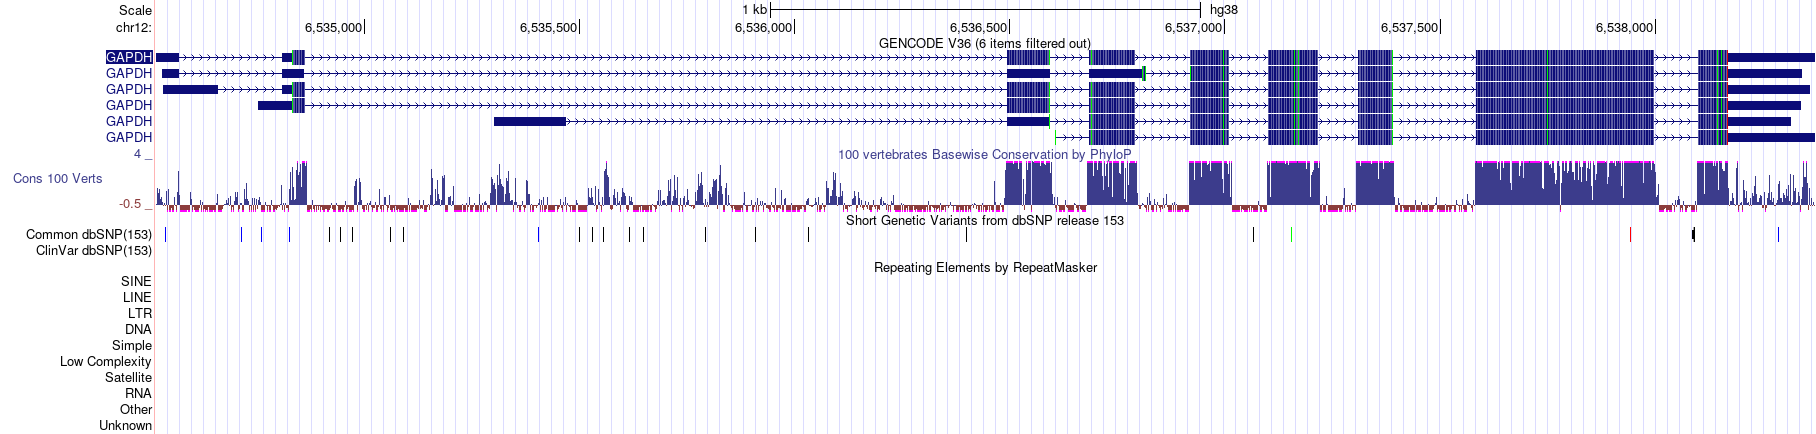

In [23]:
from IPython.display import Image
Image("1.png")

### 2. Изоформы
Все изоформы всех генов на данном участке:

In [16]:
ft = pd.read_csv("Isoforms", encoding = 'CP1251', sep ='\t')

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,type,geneName,geneName2,geneType,transcriptClass,source,transcriptType,tag,level,tier
0,chr12,6534511,6535141,ENST00000496049.1,0,+,6534511,6534511,16646144,2,...,none,GAPDH,none,none,nonCoding,havana_homo_sapiens,retained_intron,none,2,all
1,chr12,6534516,6538371,ENST00000229239.10,0,+,6534832,6538170,789624,9,...,none,GAPDH,V9HVZ4,none,coding,havana_homo_sapiens,protein_coding,"CCDS,MANE_Select,appris_principal_1,basic",2,"canonical,basic,all"
2,chr12,6534531,6538340,ENST00000396856.5,0,+,6536806,6538170,789624,9,...,none,GAPDH,E7EUT5,none,coding,havana_homo_sapiens,protein_coding,basic,2,"basic,all"
3,chr12,6534532,6537798,ENST00000492719.5,0,+,6534532,6534532,16646144,8,...,none,GAPDH,none,none,nonCoding,havana_homo_sapiens,retained_intron,none,2,all
4,chr12,6534533,6538359,ENST00000396861.5,0,+,6534832,6538170,789624,9,...,none,GAPDH,V9HVZ4,none,coding,ensembl_havana_transcript_homo_sapiens,protein_coding,"CCDS,appris_principal_1,basic",2,"basic,all"
5,chr12,6534540,6538314,ENST00000474249.5,0,+,6534540,6534540,16646144,8,...,none,GAPDH,none,none,nonCoding,havana_homo_sapiens,retained_intron,none,2,all
6,chr12,6534753,6538317,ENST00000466588.5,0,+,6534753,6534753,16646144,7,...,none,GAPDH,none,none,nonCoding,havana_homo_sapiens,retained_intron,none,2,all
7,chr12,6534753,6538339,ENST00000396859.5,0,+,6534832,6538170,789624,8,...,none,GAPDH,V9HVZ4,none,coding,havana_homo_sapiens,protein_coding,"CCDS,appris_principal_1,basic",2,"basic,all"
8,chr12,6534791,6538337,ENST00000466525.1,0,+,6534791,6534791,16646144,4,...,none,GAPDH,none,none,nonCoding,havana_homo_sapiens,retained_intron,none,2,all
9,chr12,6535301,6538315,ENST00000396858.5,0,+,6536590,6538170,789624,8,...,none,GAPDH,P04406,none,coding,havana_homo_sapiens,protein_coding,"CCDS,basic",2,"basic,all"


### 3. Интроны и экзоны

In [19]:
pd.read_csv("intron", encoding = 'CP1251', sep ='\t', header=None)

,0,1,2,3,4,5
0,chr12,6534569,6534809,ENST00000229239.10_intron_0_0_chr12_6534570_f,0,+
1,chr12,6534861,6536493,ENST00000229239.10_intron_1_0_chr12_6534862_f,0,+
2,chr12,6536593,6536683,ENST00000229239.10_intron_2_0_chr12_6536594_f,0,+
3,chr12,6536790,6536919,ENST00000229239.10_intron_3_0_chr12_6536791_f,0,+
4,chr12,6537010,6537100,ENST00000229239.10_intron_4_0_chr12_6537011_f,0,+
5,chr12,6537216,6537308,ENST00000229239.10_intron_5_0_chr12_6537217_f,0,+
6,chr12,6537390,6537583,ENST00000229239.10_intron_6_0_chr12_6537391_f,0,+
7,chr12,6537996,6538100,ENST00000229239.10_intron_7_0_chr12_6537997_f,0,+
8,chr12,6534569,6534809,ENST00000396856.5_intron_0_0_chr12_6534570_f,0,+
9,chr12,6534861,6536493,ENST00000396856.5_intron_1_0_chr12_6534862_f,0,+


In [20]:
pd.read_csv("exon", encoding = 'CP1251', sep ='\t', header=None)

,0,1,2,3,4,5
0,chr12,6534516,6534569,ENST00000229239.10_exon_0_0_chr12_6534517_f,0,+
1,chr12,6534809,6534861,ENST00000229239.10_exon_1_0_chr12_6534810_f,0,+
2,chr12,6536493,6536593,ENST00000229239.10_exon_2_0_chr12_6536494_f,0,+
3,chr12,6536683,6536790,ENST00000229239.10_exon_3_0_chr12_6536684_f,0,+
4,chr12,6536919,6537010,ENST00000229239.10_exon_4_0_chr12_6536920_f,0,+
5,chr12,6537100,6537216,ENST00000229239.10_exon_5_0_chr12_6537101_f,0,+
6,chr12,6537308,6537390,ENST00000229239.10_exon_6_0_chr12_6537309_f,0,+
7,chr12,6537583,6537996,ENST00000229239.10_exon_7_0_chr12_6537584_f,0,+
8,chr12,6538100,6538371,ENST00000229239.10_exon_8_0_chr12_6538101_f,0,+
9,chr12,6534531,6534569,ENST00000396856.5_exon_0_0_chr12_6534532_f,0,+


### 4. Clinically relevant SNPs
Из иллюстрации пункта 1 видно, что они не попадают ни в какие участки.

### 5. Транспозоны
Из иллюстрации пункта 1 видно, что транспозон у гена нет.